In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

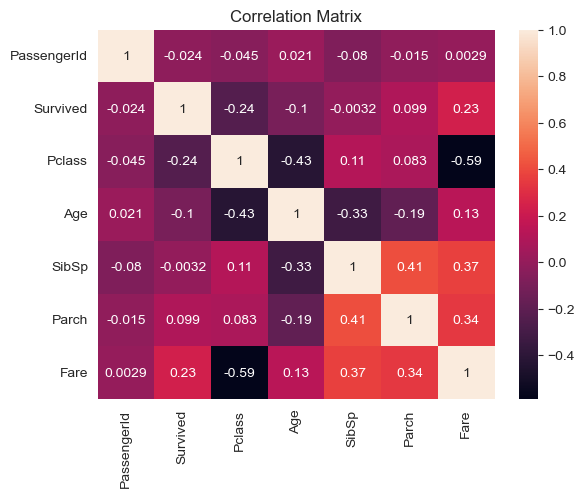

In [39]:
sns.heatmap(df.select_dtypes([int,float]).corr(),annot=True ).set_title("Correlation Matrix");


### Boxplot to show relation of Age with the Pclass 

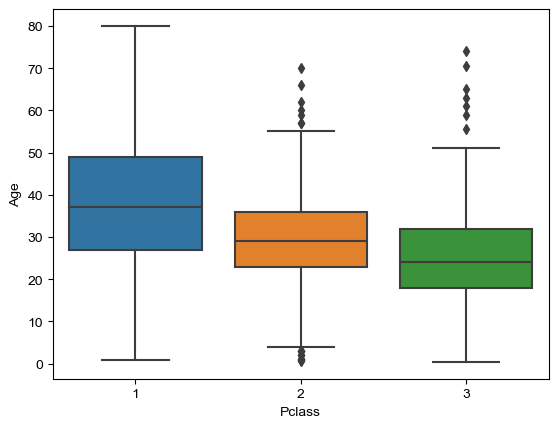

In [5]:
sns.boxplot(data=df,x="Pclass",y="Age")
sns.set_style("whitegrid")

#### Filling the missnig values of Age 

In [6]:
def fillup_age(row):
    if(pd.isnull(row["Age"])):
        if(row["Pclass"]==1):
            return 37
        elif(row["Pclass"]==2):
            return 29
        elif(row["Pclass"]==3):
            return 23
            
    else:
        return row["Age"]
     
df["Age"]=df.apply(fillup_age,axis=1)            

In [7]:
df["Age"].isna().sum()

0

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.913771,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.307723,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Removing outliers in Fare

In [11]:
 Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
outlier_step = IQR * 1.5
df=df[(df["Fare"] > Q1 - outlier_step) & (df["Fare"] < Q3 + outlier_step)]


# Analysing and Visualizations

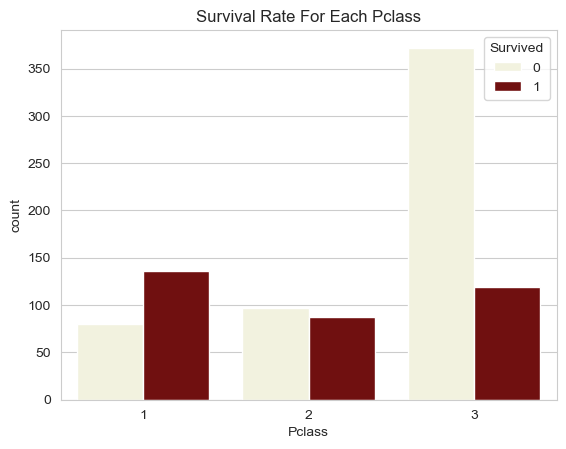

In [8]:
g=sns.countplot(data=df,x="Pclass",hue="Survived",palette=["beige","maroon"])
g.set_title("Survival Rate For Each Pclass");

#### Passengers from Pclass 1 Survived the most in comparison to other Pclass

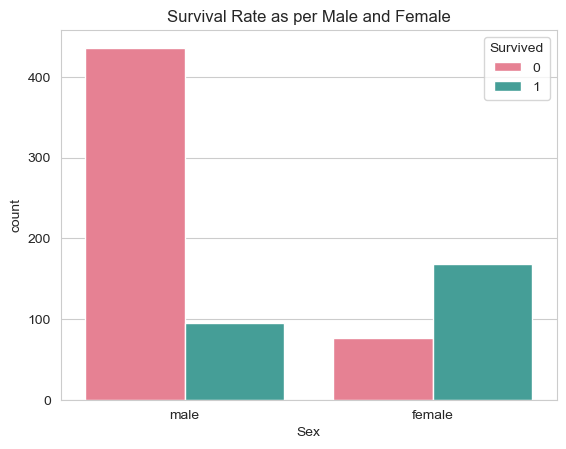

In [34]:
g=sns.countplot(data=df,x="Sex",hue="Survived",palette="husl")
g.set_title("Survival Rate as per Male and Female");

#### Female survived more a compared to Male

C:\Users\Acer\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


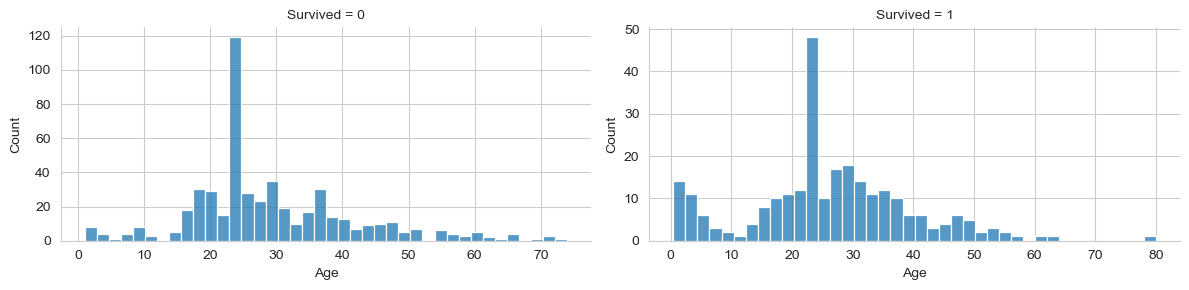

In [33]:
g=sns.FacetGrid(data=df,col="Survived",sharey=False,sharex=False,aspect=2)
g.map_dataframe(sns.histplot,x="Age",bins=40);

#### People from the age group of 20-30 didn't survive the most
#### People below 0-10 survived the most